## Logistic Regression Example 

This is a simple example to examine basic functionalities about logistic regression modeling with sklearn. The considered data set is `iris` below. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica 

You can see the details from here: 

- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html



In [1]:
# Necessary packages 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
X = iris["data"][:, 3:] # petal width
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [4]:
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = 'none')

log_reg.fit(X, y)

LogisticRegression(penalty='none')

In [7]:
log_reg.coef_

array([[12.94727021]])

In [8]:
log_reg.predict_proba(X)

array([[9.99999991e-01, 8.91262963e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999881e-01, 1.18738461e-07],
       [9.99999967e-01, 3.25310926e-08],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999998e-01, 2.44181671e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999998e-01, 2.44181671e-09],
       [9.99999998e-01, 2.44181671e-09],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999881e-01, 1.18738461e-07],
       [9.99999881e-01, 1.18738461e-07],
       [9.99999967e-01, 3.25310926e-08],
       [9.99999967e-01, 3.25310926e-08],
       [9.99999967e-01, 3.25310926e-08],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999881e-01, 1.18738461e-07],
       [9.99999991e-01, 8.91262963e-09],
       [9.99999567e-01, 4.33395181e-07],
       [9.999999

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm

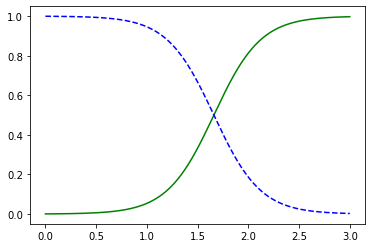

In [13]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

Consider two different features, instead of one. 


([], [])

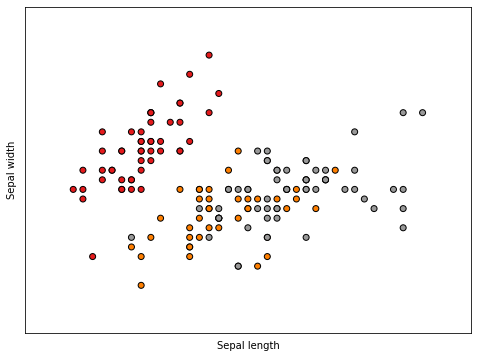

In [9]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [10]:
log_reg = LogisticRegression(penalty = 'none')

log_reg.fit(X, y)
log_reg.predict_proba(X)[:5]

array([[1.00000000e+00, 7.43272357e-31, 1.08147046e-31],
       [1.00000000e+00, 3.88445086e-18, 3.15562755e-19],
       [1.00000000e+00, 3.44306072e-39, 2.07306318e-40],
       [1.00000000e+00, 4.56547029e-40, 2.18252898e-41],
       [1.00000000e+00, 2.21286799e-41, 2.77190320e-42]])

In [18]:
print(log_reg.predict_proba([[5, 2]]))

print(log_reg.predict([[5, 2]]))

[[0.05594429 0.87579669 0.06825902]]
[1]


In [23]:
softmax_reg = LogisticRegression(multi_class="multinomial", C = 5)
softmax_reg.fit(X, y)

softmax_reg.coef_

array([[-4.25033483,  3.79928454],
       [ 1.25766055, -2.21000477],
       [ 2.99267428, -1.58927977]])

In [24]:
softmax_reg.predict_proba(X)[:5]

array([[9.81050388e-01, 1.57596160e-02, 3.18999578e-03],
       [8.93630862e-01, 9.62708196e-02, 1.00983182e-02],
       [9.88467447e-01, 1.06394761e-02, 8.93076650e-04],
       [9.88076388e-01, 1.11819955e-02, 7.41616477e-04],
       [9.94038649e-01, 5.04740632e-03, 9.13944454e-04]])

In [25]:
print(softmax_reg.predict_proba([[5, 2]]))

print(softmax_reg.predict([[5, 2]]))

[[0.0121659  0.92574451 0.06208959]]
[1]
